# Explainability
Generate SHAP plots for all models.

## Imports

In [17]:
# 📦 1. Import Libraries
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
from pathlib import Path

## Load & Process Data

In [18]:
# 📂 2. Load Processed Data

print("Loading processed data...")

train_df = pd.read_csv('../datasets/processed_train.csv')
test_df = pd.read_csv('../datasets/processed_test.csv')

X_train = train_df.drop('target', axis=1)
X_test = test_df.drop('target', axis=1)

Loading processed data...


In [19]:
# 📁 3. Setup
base = Path('../outputs')
index = 24  # Index for local SHAP explanation

## Logistic Regression Model – SHAP Analysis

Explaining Logistic Regression...


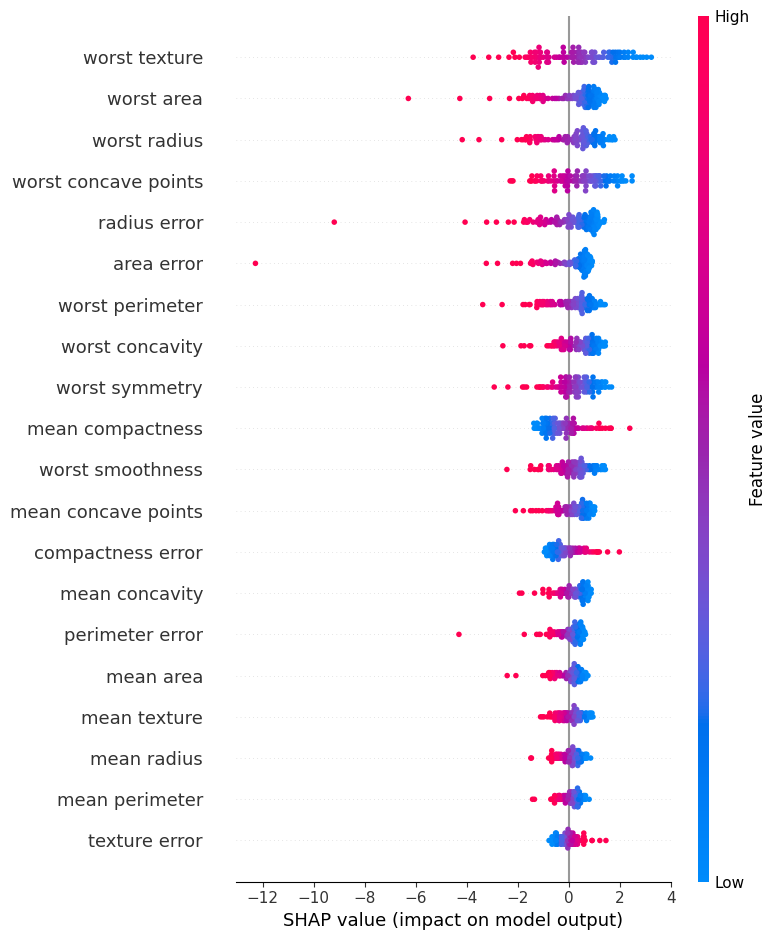

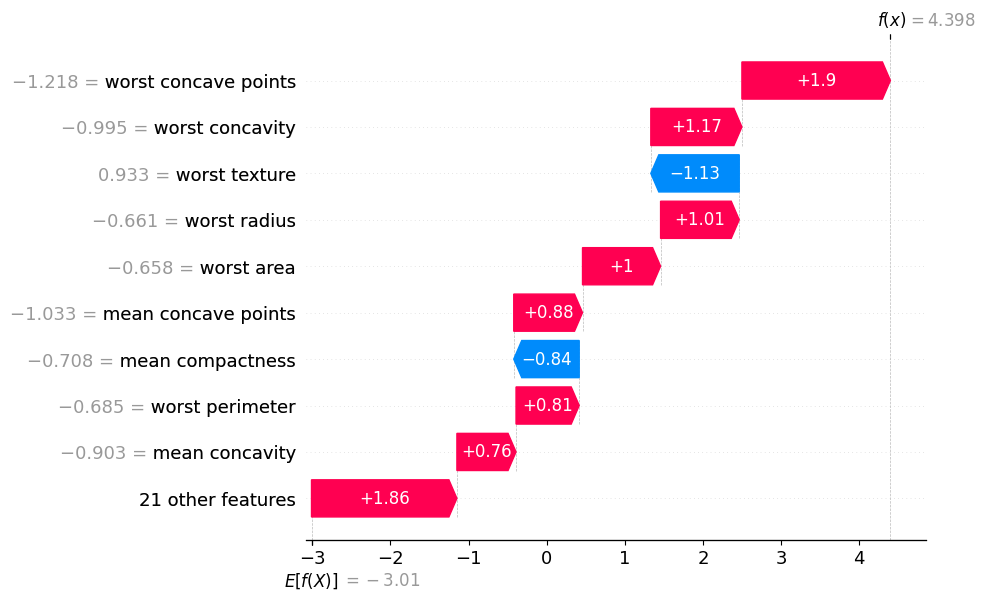

SHAP plots saved to ../outputs/Logistic Regression/plots/


In [20]:
# 🚀 4A. SHAP for Logistic Regression

print("Explaining Logistic Regression...")

model = joblib.load(base / 'Logistic Regression' / 'model' / 'logistic_regression_model.pkl')
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

plot_dir = base / 'Logistic Regression' / 'plots'
plot_dir.mkdir(parents=True, exist_ok=True)

# Global Summary Plot
summary_path = plot_dir / 'shap_summary.png'
shap.summary_plot(shap_values, features=X_test, show=False)
plt.tight_layout()
plt.savefig(summary_path, bbox_inches='tight')
plt.show()
plt.close()

# Local Explanation
local_path = plot_dir / f'shap_local_{index}.png'
shap.plots.waterfall(shap_values[min(index, len(shap_values) - 1)], show=False)
plt.savefig(local_path, bbox_inches='tight')
plt.show()
plt.close()

print(f'SHAP plots saved to {plot_dir}/')

## Random Forest Model – SHAP Analysis

Explaining Random Forest...


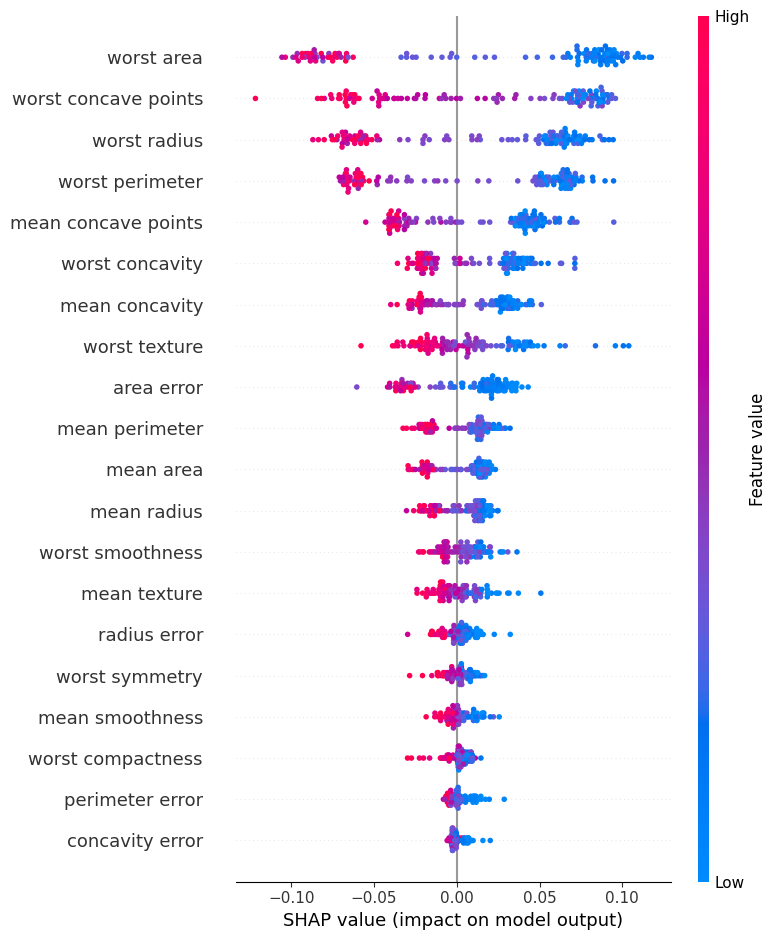

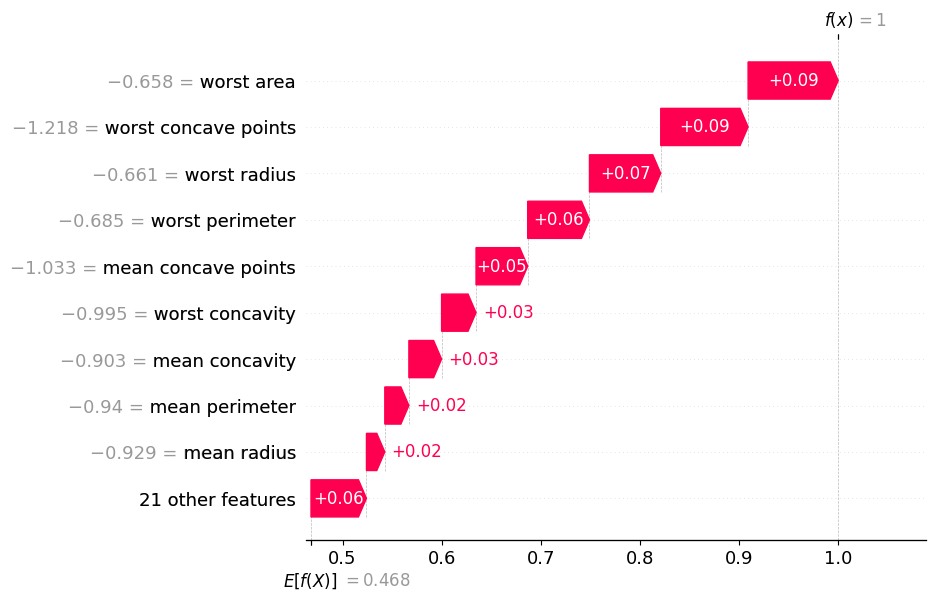

SHAP plots saved to ../outputs/Random Forest/plots/


In [21]:
# 🌲 4B. SHAP for Random Forest

print("Explaining Random Forest...")

model = joblib.load(base / 'Random Forest' / 'model' / 'random_forest_model.pkl')
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Handle Multi-output Shape
if len(shap_values.shape) == 3:
    sv = shap.Explanation(
        values=shap_values.values[:, :, 1],
        base_values=shap_values.base_values[:, 1],
        data=shap_values.data,
        feature_names=shap_values.feature_names,
    )
else:
    sv = shap_values

plot_dir = base / 'Random Forest' / 'plots'
plot_dir.mkdir(parents=True, exist_ok=True)

# Global Summary Plot
summary_path = plot_dir / 'shap_summary.png'
shap.summary_plot(sv, features=X_test.iloc[:sv.shape[0]], show=False)
plt.tight_layout()
plt.savefig(summary_path, bbox_inches='tight')
plt.show()
plt.close()

# Local Explanation
local_path = plot_dir / f'shap_local_{index}.png'
shap.plots.waterfall(sv[min(index, len(sv) - 1)], show=False)
plt.savefig(local_path, bbox_inches='tight')
plt.show()
plt.close()

print(f'SHAP plots saved to {plot_dir}/')

## SVM Model – SHAP Analysis

Explaining SVM...


  0%|          | 0/50 [00:00<?, ?it/s]

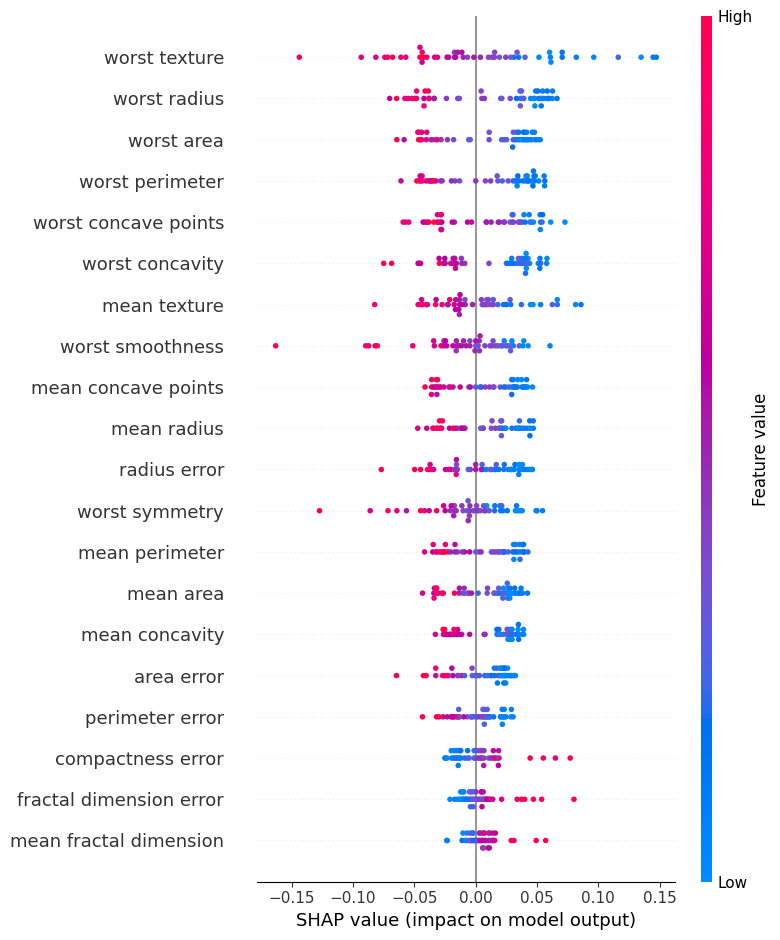

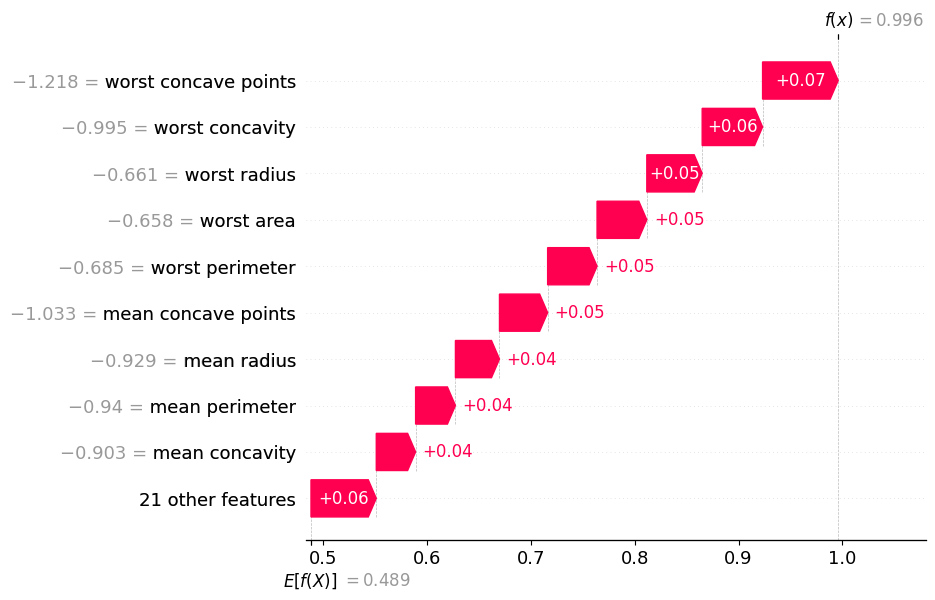

SHAP plots saved to ../outputs/SVM/plots/


In [22]:
# ⚙️ 4C. SHAP for SVM (KernelExplainer)

print("Explaining SVM...")

model = joblib.load(base / 'SVM' / 'model' / 'svm_model.pkl')
background = shap.sample(X_train, 50, random_state=42)
explainer = shap.KernelExplainer(model.predict_proba, background)
shap_values = explainer.shap_values(X_test.iloc[:50])

# Handle SHAP list format
values = shap_values[1] if isinstance(shap_values, list) else shap_values[:, :, 1]
sv = shap.Explanation(
    values=values,
    base_values=explainer.expected_value[1],
    data=X_test.iloc[:50].values,
    feature_names=X_test.columns,
)

plot_dir = base / 'SVM' / 'plots'
plot_dir.mkdir(parents=True, exist_ok=True)

# Global Summary Plot
summary_path = plot_dir / 'shap_summary.png'
shap.summary_plot(sv, features=X_test.iloc[:len(sv)], show=False)
plt.tight_layout()
plt.savefig(summary_path, bbox_inches='tight')
plt.show()
plt.close()

# Local Explanation
local_path = plot_dir / f'shap_local_{index}.png'
shap.plots.waterfall(sv[min(index, len(sv) - 1)], show=False)
plt.savefig(local_path, bbox_inches='tight')
plt.show()
plt.close()

print(f'SHAP plots saved to {plot_dir}/')